# Time Analysis

This notebook contains time analysis for statistical sampling based estimators vs. the proposed framework.

In [1]:
from time import perf_counter
import sys
sys.path.insert(0, './../')

from estimators import GEE, AE, UJ2A, SGD, PA, RLS
from visualization import time_estimate, time_fit, time_predict, df_to_pdf
from preprocessing import TraceStats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


In [2]:
statistical = [GEE('GEE'), AE('AE'), UJ2A('UJ2A')]
features = ['f_1' , 'f_2', 'f_3', 'avg_pkt_len', 'syn_count']
online_ml = [SGD, PA, RLS]
online_ml_names = ['SGD', 'PA', 'RLS']
sampling_rates = [0.1, 0.1, 0.2, 0.3, 0.4, 0.5]

# load ts
tss = [TraceStats.load('./../data/time_analysis_caida-2016_100K_%.4f.pickle' % sampling_rate) for sampling_rate in sampling_rates]
tss[0].batch_count

446

In [3]:
%%script false 
# create estimate df
df_estimate = time_estimate(tss, statistical)
df_estimate = df_estimate.iloc[1:]

df_estimate = df_estimate.rename(index=str, columns={'Sample Size': 'Mean Sample Size'})
df_estimate.to_pickle('time_estimate.pickle')

In [4]:
# load df
df_estimate = pd.read_pickle('time_estimate.pickle')
df_to_pdf(df_estimate, 'time_estimate', print_index=False, digit_round=None,
          comma_separated_columns=['Mean Sample Size'], gen_latex=True)
df_estimate

,Mean Sample Size,GEE,AE,UJ2A
1,"10,000",6.20e-06,2.72e-03,4.86e-05
2,"20,000",7.69e-06,4.06e-03,6.99e-05
3,"30,000",9.01e-06,5.33e-03,8.95e-05
4,"40,000",1.03e-05,6.33e-03,1.08e-04
5,"50,000",1.14e-05,7.44e-03,1.34e-04


In [5]:
%%script false 
df_fit = time_fit(tss, online_ml, online_ml_names, features)
df_fit = df_fit.iloc[1:]

df_fit = df_fit.rename(index=str, columns={'Sample Size': 'Mean Sample Size'})
df_fit.to_pickle('time_fit.pickle')

In [6]:
df_fit = pd.read_pickle('time_fit.pickle')
df_to_pdf(df_fit, 'time_fit', print_index=False, digit_round=None,
          comma_separated_columns=['Mean Sample Size'], gen_latex=True)
df_fit

,Mean Sample Size,SGD,PA,RLS
1,"10,000",2.38e-05,3.70e-05,2.66e-05
2,"20,000",2.08e-05,3.49e-05,2.66e-05
3,"30,000",2.09e-05,3.49e-05,3.06e-05
4,"40,000",2.13e-05,3.51e-05,2.65e-05
5,"50,000",2.82e-05,3.52e-05,2.62e-05


In [7]:
%%script false 
df_predict = time_predict(tss, online_ml, online_ml_names, features)
df_predict = df_predict.iloc[1:]

df_predict = df_predict.rename(index=str, columns={'Sample Size': 'Mean Sample Size'})
df_predict.to_pickle('time_predict.pickle')

In [8]:
df_predict = pd.read_pickle('time_predict.pickle')
df_to_pdf(df_predict, 'time_predict', print_index=False, digit_round=None,
         comma_separated_columns=['Mean Sample Size'], gen_latex=True)
df_predict

,Mean Sample Size,SGD,PA,RLS
1,"10,000",8.81e-06,8.52e-06,3.55e-06
2,"20,000",7.68e-06,8.20e-06,3.62e-06
3,"30,000",8.23e-06,8.36e-06,3.70e-06
4,"40,000",8.15e-06,8.36e-06,3.53e-06
5,"50,000",8.40e-06,9.25e-06,3.91e-06


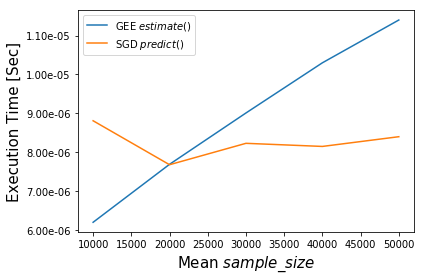

In [10]:
output_path = '/home/ynezri/TexStudio/incremental/img/'
df_estimate = pd.read_pickle('time_estimate.pickle')
df_predict = pd.read_pickle('time_predict.pickle')

df = pd.DataFrame()
df['Mean Sample Size'] = df_estimate['Mean Sample Size']
df['GEE $estimate()$'] = df_estimate.GEE

df['SGD $predict()$'] = df_predict.SGD
df=df.astype(float)
df = df.set_index('Mean Sample Size')
ax = df.plot()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
plt.ylabel('Execution Time [Sec]', fontsize=15)
plt.xlabel('Mean $sample\_size$', fontsize=15)
plt.tight_layout()
plt.savefig(output_path + 'time_compare.png')